In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
import scipy

with open('data/train.csv') as f:
    labels = f.readline()

labels = labels.split(",")

ucna = np.loadtxt('data/train.csv', delimiter=",", skiprows=1, dtype=np.str)
testna = np.loadtxt('data/test.csv', delimiter=",", skiprows=1, dtype=np.str)

In [21]:
print(labels[43], labels[44], labels[38])

1stFlrSF 2ndFlrSF TotalBsmtSF


In [5]:
fst = np.array(ucna[:,43], dtype=np.float)
print(fst)

[ 856. 1262.  920. ... 1188. 1078. 1256.]


In [6]:
snd = np.array(ucna[:,44], dtype=np.float)
print(snd)

[ 854.    0.  866. ... 1152.    0.    0.]


In [22]:
bsmt = np.array(ucna[:,38], dtype=np.float)
print(bsmt)

[ 856. 1262.  920. ... 1152. 1078. 1256.]


In [7]:
idji = np.array(ucna[:,0], dtype=np.int)
idji

array([   1,    2,    3, ..., 1458, 1459, 1460])

In [23]:
mat = np.array(np.column_stack((idji, fst, snd, bsmt)))
print(np.shape(mat))
mat

(1460, 4)


array([[1.000e+00, 8.560e+02, 8.540e+02, 8.560e+02],
       [2.000e+00, 1.262e+03, 0.000e+00, 1.262e+03],
       [3.000e+00, 9.200e+02, 8.660e+02, 9.200e+02],
       ...,
       [1.458e+03, 1.188e+03, 1.152e+03, 1.152e+03],
       [1.459e+03, 1.078e+03, 0.000e+00, 1.078e+03],
       [1.460e+03, 1.256e+03, 0.000e+00, 1.256e+03]])

In [24]:
import random

In [25]:
n = 100
t=[]
ids = []
st = 0
while True:
    tmprnd = random.randint(0, len(mat)-1)
    if(idji[tmprnd] not in ids):
        t.append(mat[tmprnd][1:])
        ids.append(idji[tmprnd])
        st+=1
    if(st>=n):
        break

t = np.array(t) #random field of houses

In [26]:
L = sch.linkage(t, method="average", metric="euclidean")

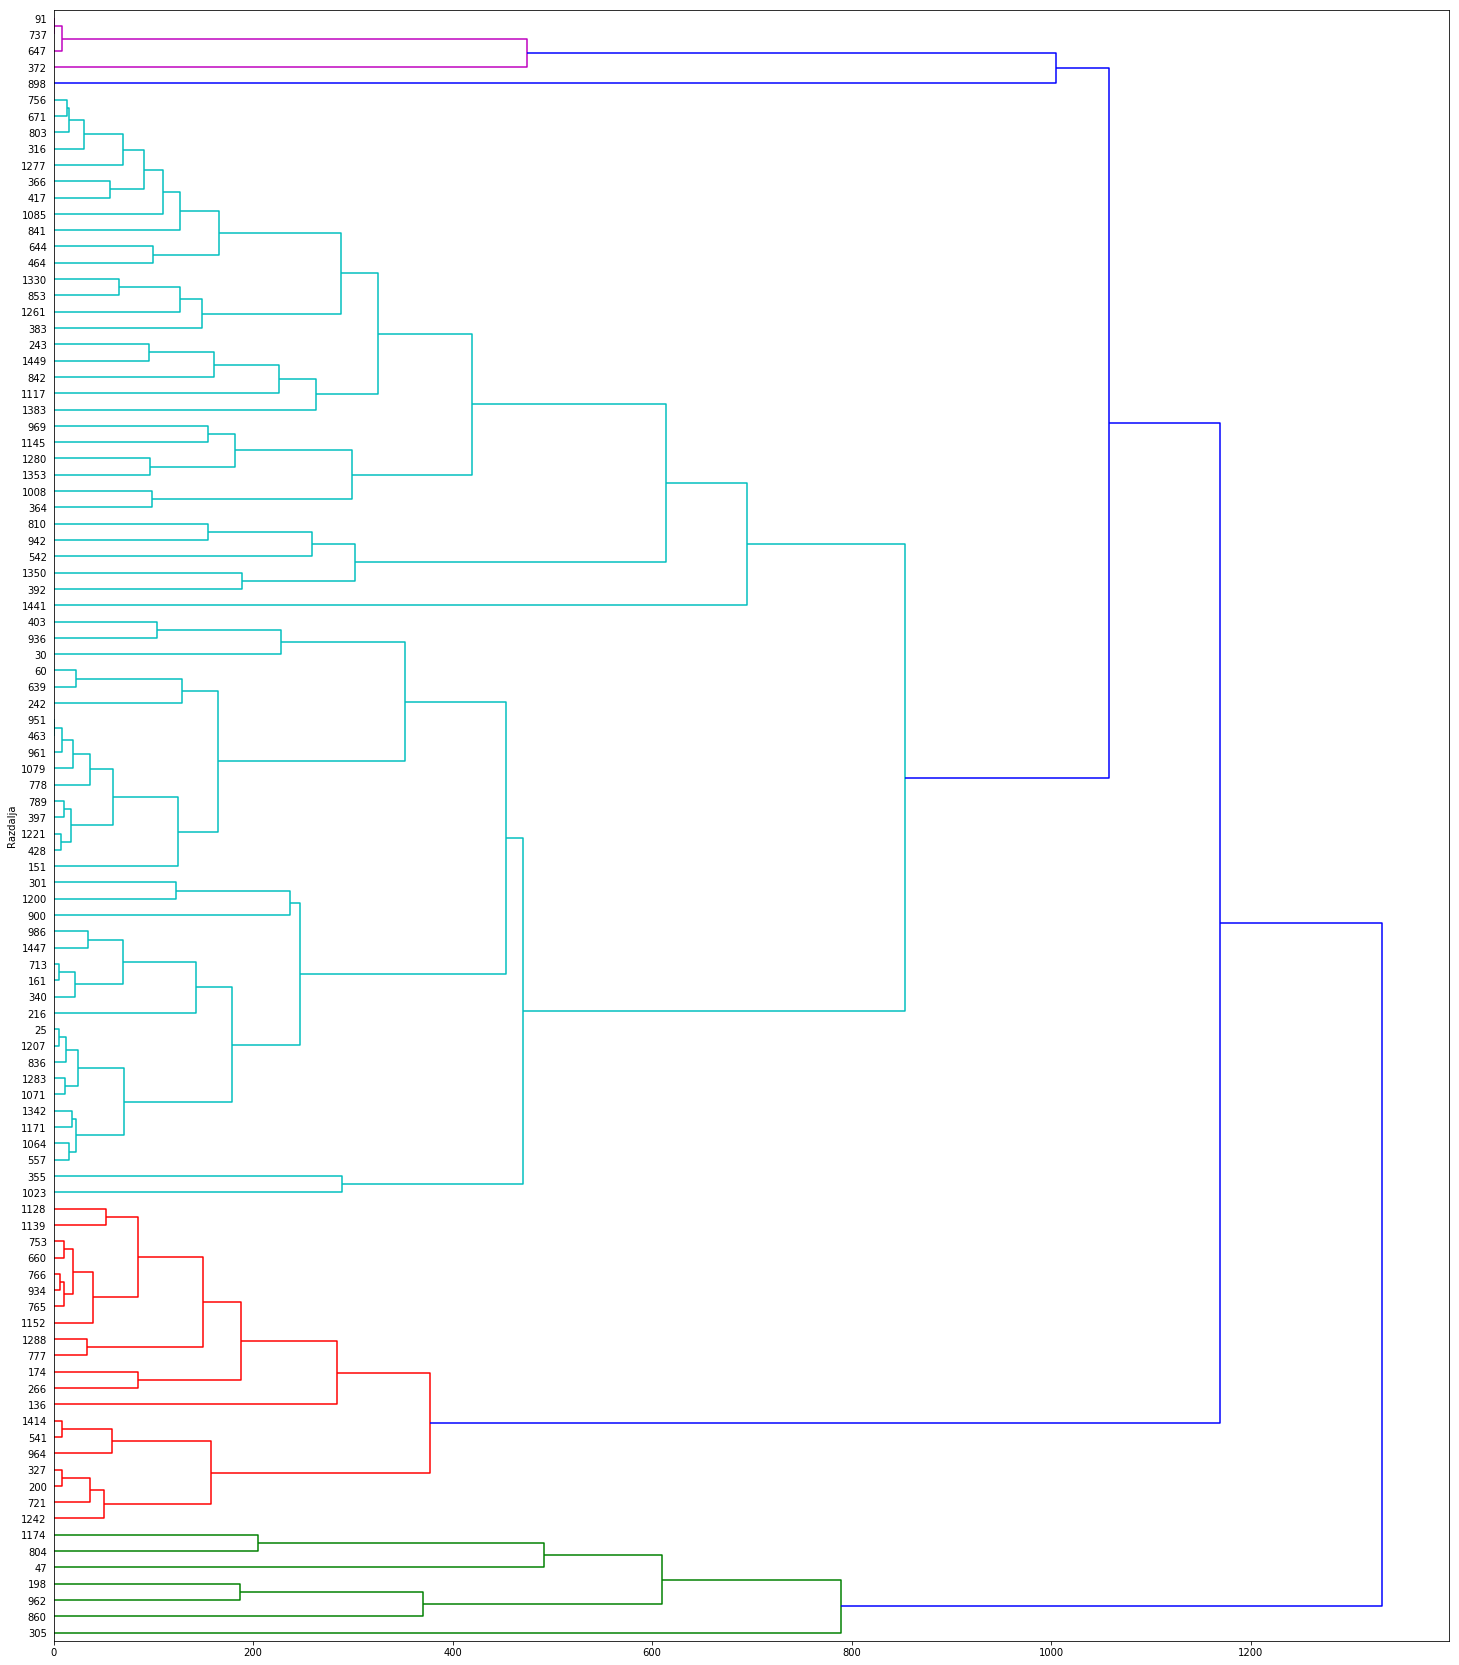

In [27]:
plt.figure(figsize=(25, 30)) 
D      = sch.dendrogram(L, labels=ids, leaf_font_size=10, orientation='right')
plt.ylabel("Razdalja")
plt.show()

In [28]:
par = 800.0
predictions = sch.fcluster(L, t=par, criterion="distance").ravel()
print(f"Število gruč pri parametru t={par} -> {max(predictions)}")

Število gruč pri parametru t=800.0 -> 6


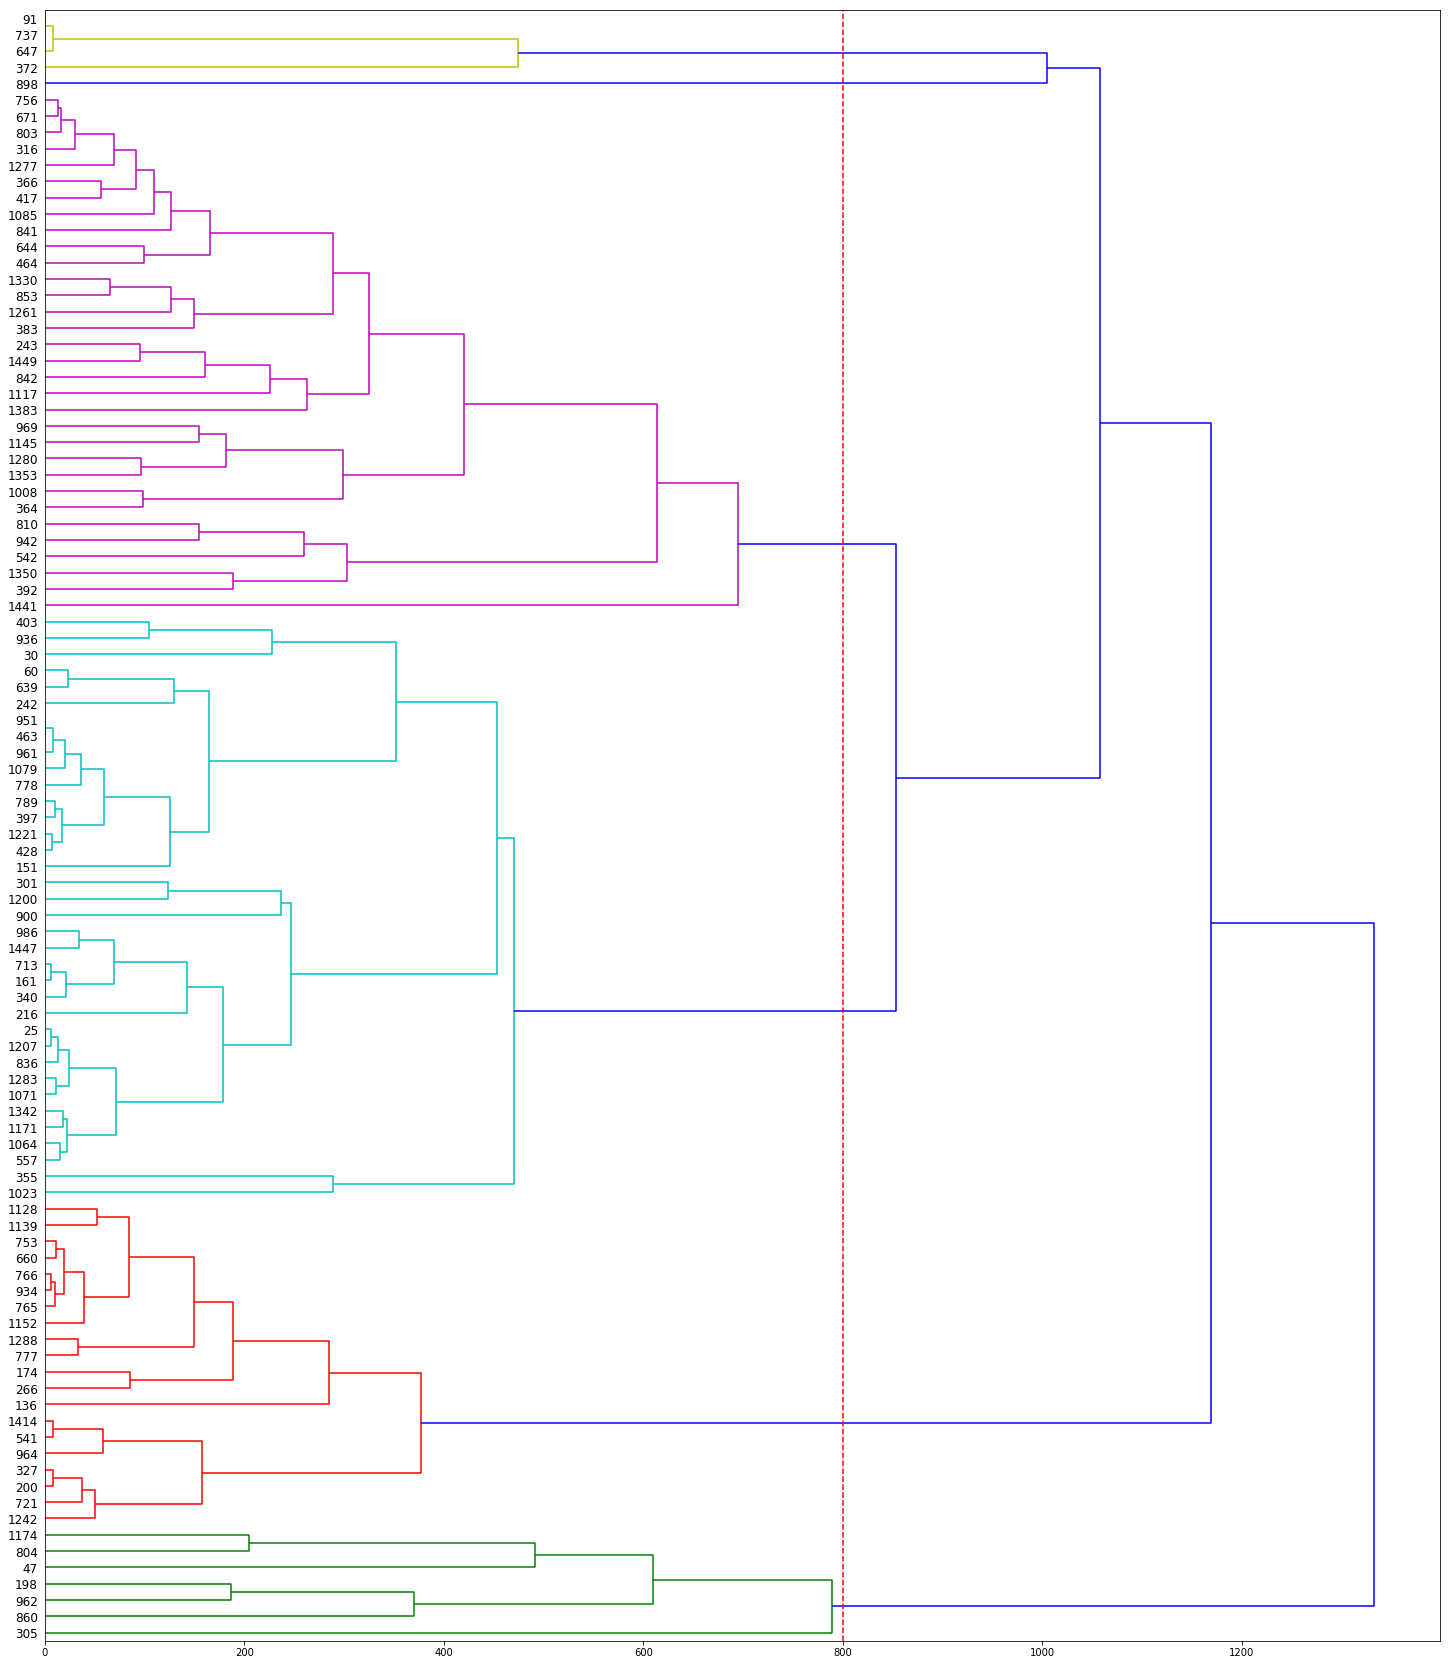

In [29]:
plt.figure(figsize=(25, 30))
D = sch.dendrogram(L, labels=ids, leaf_font_size=12, orientation="right", color_threshold=par)
plt.plot([par, par], [0, 1000], "k--", color="red")
plt.show()

In [30]:
slovargruc = {}

for key, group in list(zip(ids, predictions)):
    slovargruc[key] = group
    # print("%d - %s" % (key, group))

In [31]:
import matplotlib.cm as cm

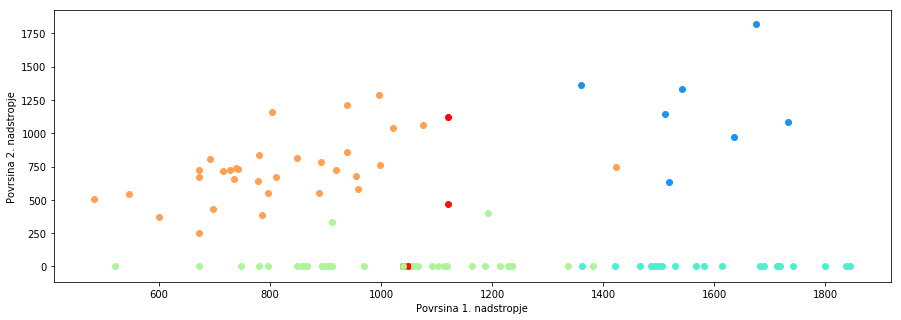

In [32]:
plt.figure(figsize=(15, 5))

for tt in range(0, len(t)):
    plt.scatter(t[tt][0], t[tt][1], color=cm.rainbow(slovargruc[ids[tt]]*50))
plt.xlabel("Povrsina 1. nadstropje")
plt.ylabel("Povrsina 2. nadstropje")
plt.show()

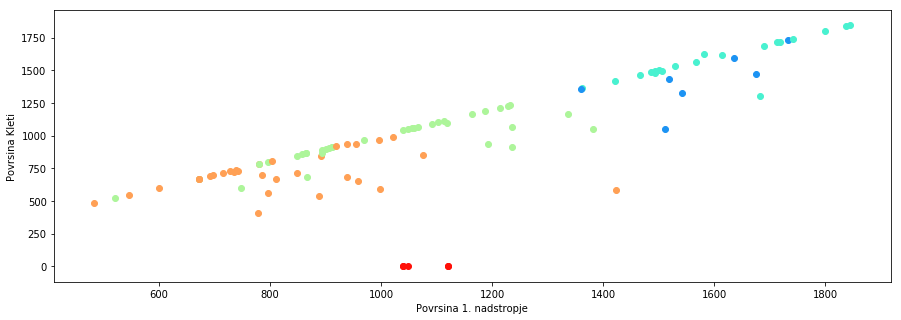

In [33]:
plt.figure(figsize=(15, 5))

for tt in range(0, len(t)):
    plt.scatter(t[tt][0], t[tt][2], color=cm.rainbow(slovargruc[ids[tt]]*50))
plt.xlabel("Povrsina 1. nadstropje")
plt.ylabel("Povrsina Kleti")
plt.show()

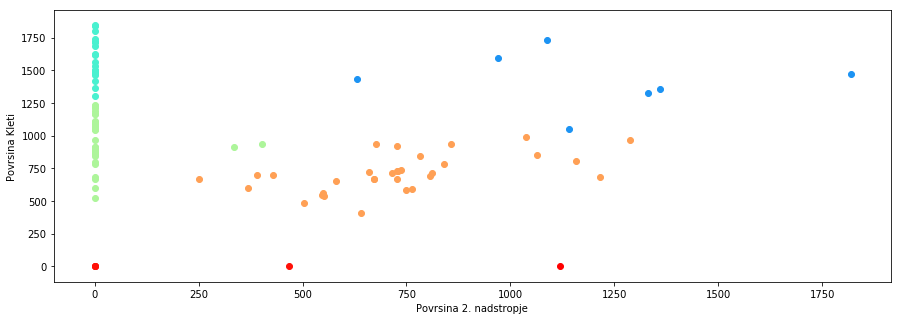

In [34]:
plt.figure(figsize=(15, 5))

for tt in range(0, len(t)):
    plt.scatter(t[tt][1], t[tt][2], color=cm.rainbow(slovargruc[ids[tt]]*50))
plt.xlabel("Povrsina 2. nadstropje")
plt.ylabel("Povrsina Kleti")
plt.show()